# COLMAP Data Testing 

In [1]:
# Using desk scene
# Attempting to import data and plot point clouds and image locations 

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import scipy.io as sio
import datetime
import trimesh 
import time
import math
from vedo import *
import ast

# # Limit GPU memory, if running notebook on GPU
# gpus = tf.config.experimental.list_physical_devices('GPU')
# print(gpus)
# if gpus:
#     try:
#         memlim = 2*1024
#         tf.config.experimental.set_virtual_device_configuration(gpus[0], [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=memlim)])
#     except RuntimeError as e:
#         print(e)

2024-07-30 14:35:50.439823: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-07-30 14:35:50.464194: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:10575] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-30 14:35:50.464216: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:479] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-30 14:35:50.465143: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1442] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-30 14:35:50.469362: I tensorflow/core/platform/cpu_feature_gua

In [13]:
# Import txt files 

imagedata_fn = "/home/daniel-choate/ASAR/s2/COLMAP/images.txt"
cameradata_fn = "/home/daniel-choate/ASAR/s2/COLMAP/cameras.txt"
pointdata_fn = "/home/daniel-choate/ASAR/s2/COLMAP/points3D.txt"

# points_data = []
points_data = np.zeros([18985, 3]) 
idx = 0

with open(pointdata_fn, 'r') as file:
    lines = file.readlines()[3:]  # Skip the first three lines
    
    for line in lines:
        elements = line.strip().split()
        
        row = [float(elem) for elem in list(elements)]
        
        # points_data.append(row)
        # print(type(row))
        # print(len(row))
        # print(row[1])
        # points_data[line,:] = row
        points_data[idx,0] = row[1]
        points_data[idx,1] = row[2]
        points_data[idx,2] = row[3]
        idx += 1


# for i in range(10): 
#     print(row)

print(points_data)
    

[[-2.65905631 -1.50349177  8.58504243]
 [-8.82692479 -5.8122741  13.09864774]
 [-1.13256708 -3.99511856  8.08170231]
 ...
 [ 2.32073842 -6.41634705  4.58050414]
 [-0.49672259 -6.73187402  3.93345339]
 [ 4.0733721  -5.32250245  5.06468191]]


In [ ]:
import open3d as o3d
print(o3d.__version__)

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


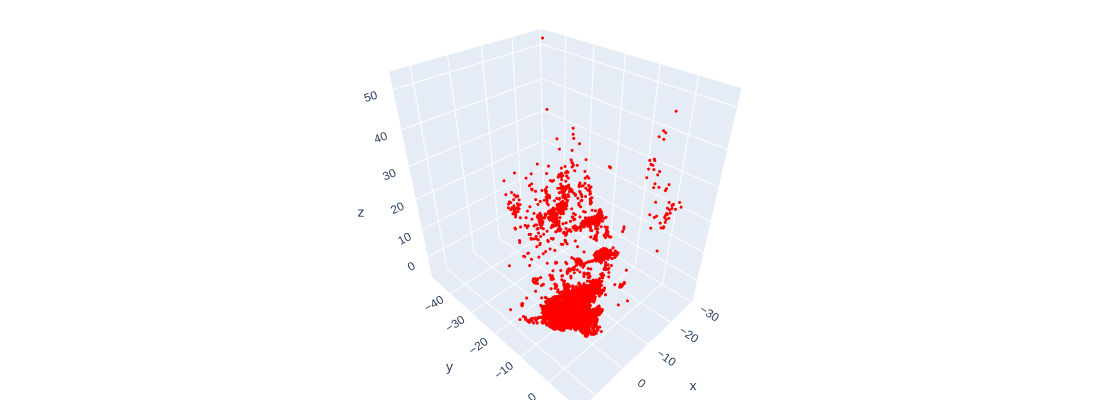

In [14]:
import open3d as o3d
import numpy as np
import plotly.graph_objects as go

pcd = o3d.geometry.PointCloud()
# points = np.random.rand(1000,3)
pcd.points = o3d.utility.Vector3dVector(points_data18985)

o3d.visualization.draw_plotly([pcd])